# naive bayes classification (gaussian)

In [77]:
# import dataset without foreign schools and missing data
df = pd.read_csv(r'../data/modeling/combined.csv', encoding = "ISO-8859-1")
df.columns

<IPython.core.display.Javascript object>

Index(['opeid', 'agemedian', 'cdr2014_log', 'cdr2015_log', 'cdr2016_log',
       'cohort2014_log', 'cohort2015_log', 'cohort2016_log', 'density_log',
       'educationcollegeorabove', 'familysize_log', 'female_sqrt',
       'homeownership', 'homevalue_log', 'incomehouseholdmedian_log',
       'incomehouseholdsixfigure_log', 'laborforceparticipation_sqrt',
       'male_reciprocal', 'married', 'population_log', 'proglength',
       'raceasian_log', 'raceblack_log', 'racemultiple_log',
       'racenative_reciprocal', 'raceother_log', 'racepacific', 'racewhite',
       'rentmedian_log', 'unemploymentrate_log', 'associates', 'bachelors',
       'firstprofessional', 'gradprofessional', 'mastersordoctors',
       'nondegree', 'nondegree1year', 'nondegree2years', 'nondegree3years',
       'private', 'proprietary', 'public', 'hbcuCollege', 'hispanicCollege',
       'nativeAmericanCollege', 'notReportedCollege'],
      dtype='object')

## predict proprietary school type

In [78]:
from sklearn.model_selection import train_test_split

# data = df.drop(columns = 'proprietary')
data = df[['associates','cdr2015_log','density_log','educationcollegeorabove','private','proglength', 'public','raceasian_log','rentmedian_log']]
target = df['proprietary']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = .25, random_state = 109)

### train set

In [79]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_train)

In [80]:
from sklearn import metrics

print('accuracy: ', metrics.accuracy_score(y_train, y_pred))

print("precision:",metrics.precision_score(y_train, y_pred))

print("recall:",metrics.recall_score(y_train, y_pred))

print("kappa:",metrics.cohen_kappa_score(y_train, y_pred))

accuracy:  1.0
precision: 1.0
recall: 1.0
kappa: 1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

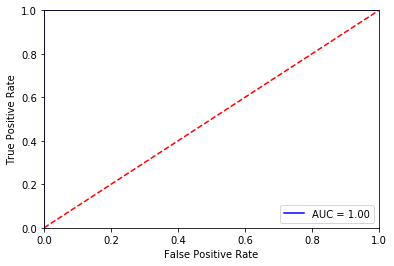

In [81]:
fpr, tpr, threshold = metrics.roc_curve(y_train, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### test set

In [82]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

In [83]:
from sklearn import metrics

print('accuracy: ', metrics.accuracy_score(y_test, y_pred))

print("precision:",metrics.precision_score(y_test, y_pred))

print("recall:",metrics.recall_score(y_test, y_pred))

print("kappa:",metrics.cohen_kappa_score(y_test, y_pred))

accuracy:  1.0
precision: 1.0
recall: 1.0
kappa: 1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

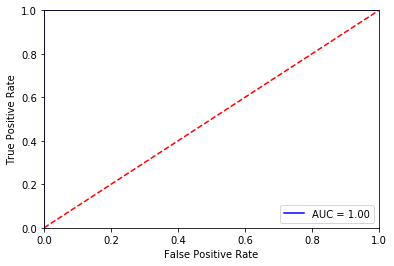

In [84]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### cross validation

In [85]:
from sklearn.model_selection import cross_val_score, cross_val_predict

y = df.proprietary
model = gnb

scores = cross_val_score(model, df, y, cv=6)
print(scores)

predictions = cross_val_predict(model, df, y, cv = 6)

# Compute the confusion matrix using crosstab function
conf_mat = pd.crosstab(y, predictions,
                       rownames=['Actual'], 
                       colnames=['Predicted'], 
                       margins = True)

# Print the confusion matrix
print('Confusion Matrix')
print(conf_mat)

print('accuracy: ', metrics.accuracy_score(y, predictions))

print("precision:",metrics.precision_score(y, predictions))

print("recall:",metrics.recall_score(y, predictions))

print("kappa:",metrics.cohen_kappa_score(y, predictions))

[0.86143573 0.99833055 1.         1.         1.         0.34782609]


<IPython.core.display.Javascript object>

Confusion Matrix
Predicted     0     1   All
Actual                     
0          2051   390  2441
1            84  1066  1150
All        2135  1456  3591
accuracy:  0.8680033416875522
precision: 0.7321428571428571
recall: 0.9269565217391305
kappa: 0.7167522056476695


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

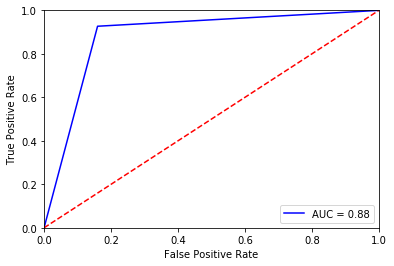

0.8835929679568245


In [86]:
fpr, tpr, threshold = metrics.roc_curve(y, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print(roc_auc)

## predict high vs low cdr

In [87]:
# find median log cdr value for 2016
df.cdr2016_log.median()

0.536775872

In [88]:
df['cdrHigh'] = [1 if x >= 0.536775872 else 0 for x in df.cdr2016_log]

In [89]:
df.cdrHigh.value_counts()

1    1796
0    1795
Name: cdrHigh, dtype: int64

In [90]:
from sklearn.model_selection import train_test_split

# data = df.drop(columns = 'cdrHigh')
data = df[['associates','cdr2015_log','density_log','educationcollegeorabove','private','proglength', 'public','raceasian_log','rentmedian_log', 'proprietary']]
target = df['cdrHigh']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = .25, random_state = 109)

### train set

In [91]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_train)

In [92]:
from sklearn import metrics

print('accuracy: ', metrics.accuracy_score(y_train, y_pred))

print("precision:",metrics.precision_score(y_train, y_pred))

print("recall:",metrics.recall_score(y_train, y_pred))

print("kappa:",metrics.cohen_kappa_score(y_train, y_pred))

accuracy:  0.8080207946528035
precision: 0.8067104303428154
recall: 0.8144329896907216
kappa: 0.615981912868105


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

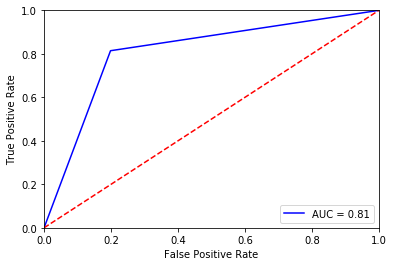

In [93]:
fpr, tpr, threshold = metrics.roc_curve(y_train, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### test set

In [94]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

In [95]:
from sklearn import metrics

print('accuracy: ', metrics.accuracy_score(y_test, y_pred))

print("precision:",metrics.precision_score(y_test, y_pred))

print("recall:",metrics.recall_score(y_test, y_pred))

print("kappa:",metrics.cohen_kappa_score(y_test, y_pred))

accuracy:  0.8095768374164811
precision: 0.7934065934065934
recall: 0.8242009132420092
kappa: 0.6192783152424541


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

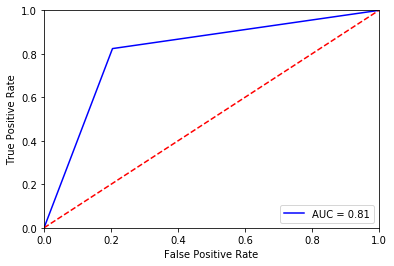

In [96]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### cross validation

In [97]:
from sklearn.model_selection import cross_val_score, cross_val_predict

y = df.cdrHigh
model = gnb

scores = cross_val_score(model, df, y, cv=6)
print(scores)

predictions = cross_val_predict(model, df, y, cv = 6)

# Compute the confusion matrix using crosstab function
conf_mat = pd.crosstab(y, predictions,
                       rownames=['Actual'], 
                       colnames=['Predicted'], 
                       margins = True)

# Print the confusion matrix
print('Confusion Matrix')
print(conf_mat)

print('accuracy: ', metrics.accuracy_score(y, predictions))

print("precision:",metrics.precision_score(y, predictions))

print("recall:",metrics.recall_score(y, predictions))

print("kappa:",metrics.cohen_kappa_score(y, predictions))

[0.92654424 0.90317195 0.9933222  0.98996656 0.98829431 0.7826087 ]


<IPython.core.display.Javascript object>

Confusion Matrix
Predicted     0     1   All
Actual                     
0          1664   131  1795
1           118  1678  1796
All        1782  1809  3591
accuracy:  0.9306599832915622
precision: 0.9275843007186291
recall: 0.9342984409799554
kappa: 0.8613196762157612


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

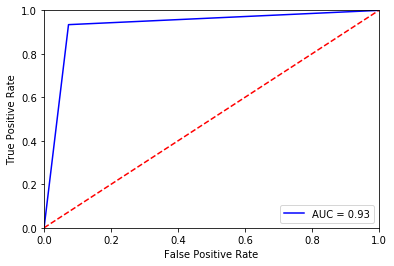

0.9306589697935987


In [98]:
fpr, tpr, threshold = metrics.roc_curve(y, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print(roc_auc)